In [1]:
!which python

/Users/nordin/anaconda/bin/python


In [2]:
%load_ext version_information

In [3]:
%version_information numpy, scipy, matplotlib, sympy, pandas

/Users/nordin/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:827: FormatterWarning: JSON expects JSONable list/dict containers, not JSON strings
  FormatterWarning)


Software versions
Python 2.7.9 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 3.1.0
OS Darwin 13.3.0 x86_64 i386 64bit
numpy 1.9.2
scipy 0.15.1
matplotlib 1.4.3
sympy 0.7.6
pandas 0.15.2
Wed May 06 13:19:26 2015 MDT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from scipy import misc
from scipy import ndimage
from skimage.filters import roberts, sobel, scharr

In [2]:
color_1s = misc.imread('10s_Image0504-2344(S-Video)(1).png')

In [3]:
print color_1s.shape
print color_1s[0][0]

(480, 720, 3)
[90 84 65]


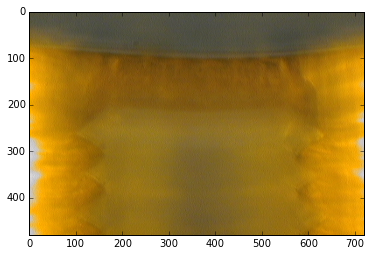

In [7]:
plt.imshow(color_1s)

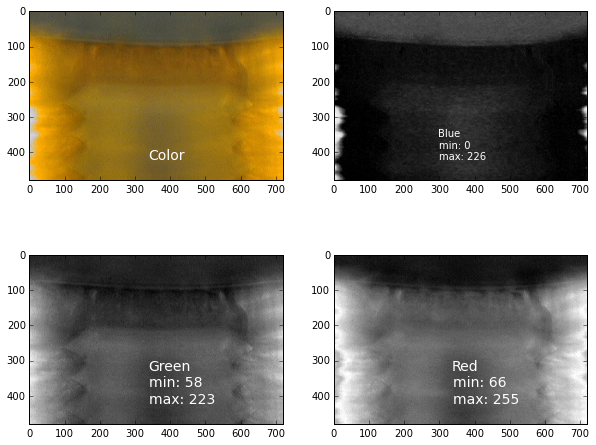

In [31]:
fontsize = 14

fig, ((ax_color, ax_blue), (ax_green, ax_red)) = plt.subplots(2, 2, figsize=(10,8))
im_color = ax_color.imshow(color_1s)
im_blue = ax_blue.imshow(color_1s[:,:,2], cmap=plt.cm.gray)
im_green = ax_green.imshow(color_1s[:,:,1], cmap=plt.cm.gray)
im_red = ax_red.imshow(color_1s[:,:,0], cmap=plt.cm.gray)
ax_color.text(340, 420, 'Color', fontsize=fontsize, color='white')
bluetext = 'Blue\nmin: {0}\nmax: {1}'.format(np.amin(color_1s[:,:,2]),np.amax(color_1s[:,:,2]))
ax_blue.text(300, 420, bluetext, color='white')
greentext = 'Green\nmin: {0}\nmax: {1}'.format(np.amin(color_1s[:,:,1]),np.amax(color_1s[:,:,1]))
ax_green.text(340, 420, greentext, fontsize=fontsize, color='white')
redtext = 'Red\nmin: {0}\nmax: {1}'.format(np.amin(color_1s[:,:,0]),np.amax(color_1s[:,:,0]))
ax_red.text(340, 420, redtext, fontsize=fontsize, color='white')

From:

  http://stackoverflow.com/questions/12201577/convert-rgb-image-to-grayscale-in-python
  
  http://stackoverflow.com/questions/23935840/converting-an-rgb-image-to-grayscale-and-manipulating-the-pixel-data-in-python

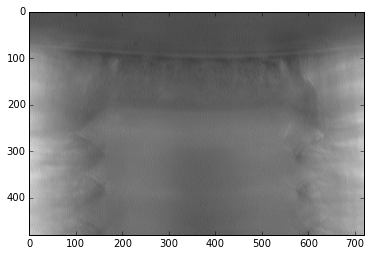

In [2]:
from PIL import Image
temp_gray = Image.open('10s_Image0504-2344(S-Video)(1).png').convert('LA')
plt.imshow(temp_gray)

In [3]:
temp_gray

<PIL.Image.Image image mode=LA size=720x480 at 0x10E278D88>

In [12]:
print temp_gray #dtype=np.uint8

<PIL.Image.Image image mode=LA size=720x480 at 0x10E278D88>


In [16]:
y=np.asarray(temp_gray.getdata(),dtype=np.uint8)#.reshape((temp_gray.size[1],temp_gray.size[0]))
print y.shape, y.dtype
print y

(345600, 2) uint8
[[ 83 255]
 [ 82 255]
 [ 82 255]
 ..., 
 [175 255]
 [171 255]
 [178 255]]


In [17]:
print 2*345600, 720*480

691200 345600


In [22]:
yy = y[:,0].reshape((480,720))
print yy.shape
yy

(480, 720)


array([[ 83,  82,  82, ...,  85,  86,  79],
       [ 82,  79,  80, ...,  85,  82,  80],
       [ 77,  79,  81, ...,  83,  82,  82],
       ..., 
       [201, 203, 205, ..., 172, 176, 180],
       [201, 201, 204, ..., 176, 173, 177],
       [197, 200, 205, ..., 175, 171, 178]], dtype=uint8)

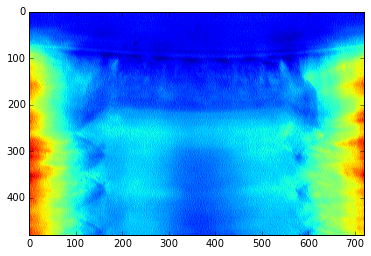

In [23]:
plt.imshow(yy)

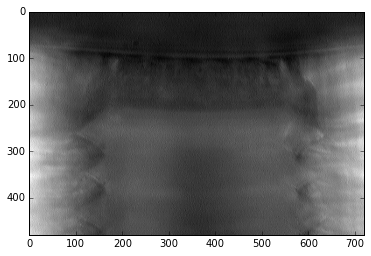

In [24]:
plt.imshow(yy, cmap=plt.cm.gray)

In [29]:
print np.amin(yy), np.amax(yy)

60 224


In [25]:
yy_edge_sobel = sobel(yy)

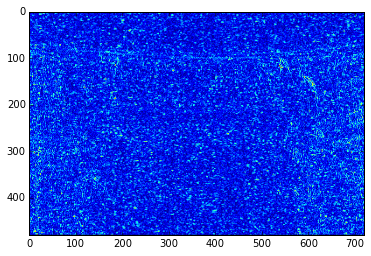

In [26]:
plt.imshow(yy_edge_sobel)

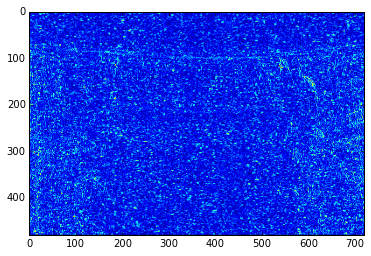

In [32]:
grn_edge_sobel = sobel(color_1s[:,:,1])
plt.imshow(grn_edge_sobel)

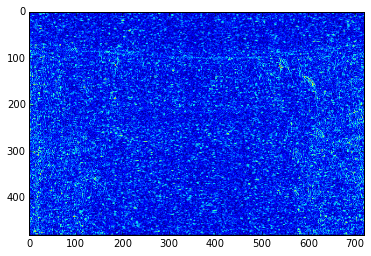

In [33]:
grn_edge_scharr = scharr(color_1s[:,:,1])
plt.imshow(grn_edge_scharr)